https://stepik.org/lesson/1370125/step/1

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_42_adaboost_classification.py

Число ошибок на обучающей выборке: 7.0 при композиции 1 решающих деревьев


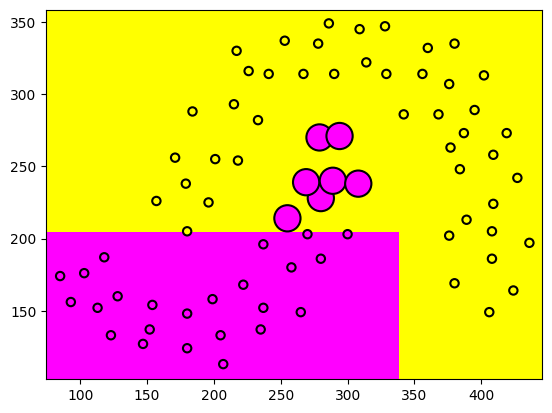

In [ ]:
# Алгоритм классификации AdaBoost на решающих деревьях

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


def get_grid(data):
    x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
    y_min, y_max = data[:, 1].min() - 10, data[:, 1].max() + 10
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))


t = [[(85, 174), (93, 156), (103, 176), (113, 152), (123, 133), (128, 160), (147, 127), (152, 137), (180, 124), (180, 148), (205, 133), (207, 113), (199, 158), (222, 168), (235, 137), (237, 152), (265, 149), (258, 180), (237, 196), (255, 214), (270, 203), (280, 186), (280, 228), (269, 239), (300, 203), (289, 240), (279, 270), (294, 271), (308, 238), (118, 187), (154, 154)], [(157, 226), (180, 205), (179, 238), (196, 225), (171, 256), (201, 255), (184, 288), (218, 254), (215, 293), (233, 282), (217, 330), (226, 316), (241, 314), (253, 337), (267, 314), (278, 335), (286, 349), (290, 314), (309, 345), (328, 347), (329, 314), (314, 322), (342, 286), (356, 314), (360, 332), (368, 286), (376, 307), (387, 273), (384, 248), (395, 289), (377, 263), (389, 213), (409, 224), (409, 258), (376, 202), (380, 169), (408, 186), (408, 205), (424, 164), (406, 149), (436, 197), (427, 242), (419, 273), (402, 313), (380, 335)]]
n1 = len(t[0])
n2 = len(t[1])

train_data = np.r_[t[0], t[1]]
train_labels = np.r_[np.ones(n1) * -1, np.ones(n2)]

# x, y = train_data[:, 0], train_data[:, 1]
# plt.scatter(x[train_labels == -1], y[train_labels == -1])
# plt.scatter(x[train_labels == 1], y[train_labels == 1])
# plt.show()

XN = len(train_data)    # длина обучающей выборки
'''ЗДЕСЬ МЕНЯЕМ T: (1, 2, 5)'''
T = 1                   # число алгоритмов в композиции
max_depth = 2           # максимальная глубина решающих деревьев
w = np.ones(XN) / XN    # начальные значения весов для объектов выборки
algs = []               # список из полученных алгоритмов
alfa = []               # список из вычисленных весов для композиции

for n in range(T):
    # создаем и обучаем решающее дерево с весами объектов w
    algs.append(DecisionTreeClassifier(criterion='gini', max_depth=max_depth))
    algs[n].fit(train_data, train_labels, sample_weight=w)

    predicted = algs[n].predict(train_data) # формируем прогнозы полученного дерева по обучающей выборке
    N = np.sum(np.abs(train_labels - predicted) / 2 * w)   # вычисляем долю неверных классификаций
    alfa.append( 0.5 * np.log((1 - N) / N) if N != 0 else np.log((1-1e-8) / 1e-8) ) # вычисляем вес для текущего алгоритма

    # пересчитываем веса объектов выборки
    w = w * np.exp(-1 * alfa[n] * train_labels * predicted)
    w = w / np.sum(w)


# вычисляем число ошибок классификации на основе полученной композиции
predicted = alfa[0] * algs[0].predict(train_data)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(train_data)

N = np.sum(np.abs(train_labels - np.sign(predicted)) / 2)
print(f"Число ошибок на обучающей выборке: {N} при композиции {T} решающих деревьев")


# отображаем полученные результаты классификации
xx, yy = get_grid(train_data)
predicted = alfa[0] * algs[0].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
for n in range(1, T):
    predicted += alfa[n] * algs[n].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='spring', shading='auto')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=5000 * w, cmap='spring', edgecolors='black', linewidth=1.5)
plt.show()